In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import numpy as np
import xlrd


In [4]:
pip install xlrd


                                              0.0/96.5 kB ? eta -:--:--
     ----------------                       41.0/96.5 kB 653.6 kB/s eta 0:00:01
     ---------------------------------------- 96.5/96.5 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
df=pd.read_excel("C:/Users/hussien/OneDrive/Desktop/Adham/adham_interns/task1.xlsx",sheet_name="Data")
df.shape
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,990150.0,1014211.0,1038618.0,1063175.0,1087700.0,1111812.0,...,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1768086.0,1756374.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,34449825.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,60414495.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,20569737.0


In [44]:
df2 = pd.melt(df,
                  id_vars=["Country Name", "Country Code","Indicator Name","Indicator Code"], 
                  var_name="year",
                  value_name="year_Value")
df2
##check data has null or not 
## get the sum of null
null_mask = df2.isnull().any(axis=1)
null_rows = df2[null_mask]
df2.dropna(subset=['year_Value'], inplace=True)
df2.isnull().sum()
df2.shape
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,year,year_Value
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54608.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1960,130692579.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8622466.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,1960,97256290.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5357195.0


In [45]:
# Group by year and aggregate the values (e.g., sum)
df_grouped = df2.groupby('year').agg({'year_Value': 'sum'}).reset_index()
df_grouped

,year,year_Value
0,1960,3.056959e+10
1,1961,3.099013e+10
2,1962,3.155858e+10
3,1963,3.226213e+10
4,1964,3.297154e+10
...,...,...
59,2019,8.316622e+10
60,2020,8.411876e+10
61,2021,8.497974e+10
62,2022,8.575979e+10


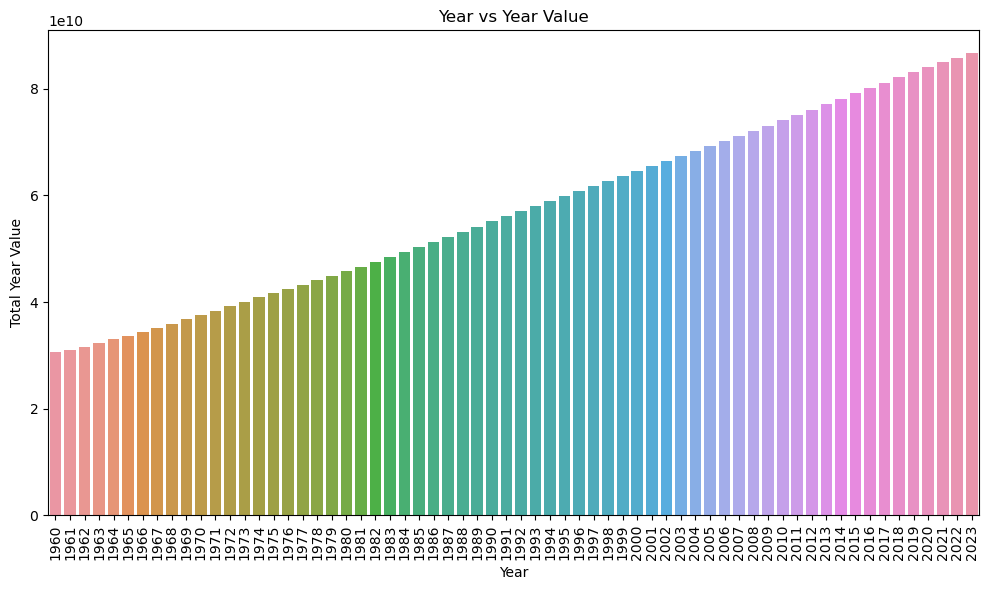

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='year', y='year_Value')

# Customize the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels if necessary
plt.title('Year vs Year Value')
plt.xlabel('Year')
plt.ylabel('Total Year Value')

# Show the plot
plt.tight_layout()
plt.show()

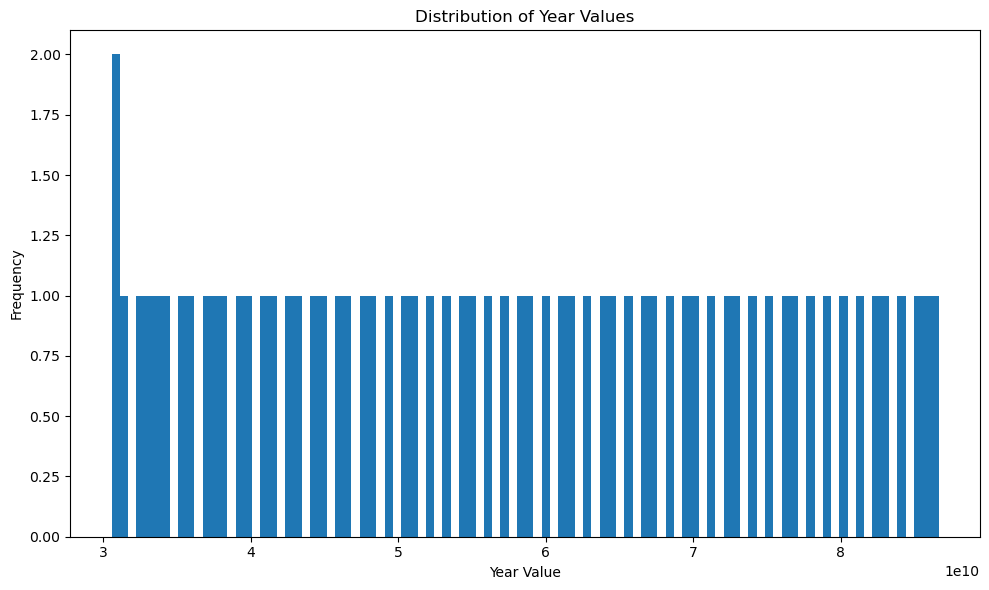

In [47]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_grouped['year_Value'], bins=100)

# Customize the plot
plt.title('Distribution of Year Values')
plt.xlabel('Year Value')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()
